# Project(Startup_funding)_Case_Study_Part-2

# Q1.
'''Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.'''

# Explanation:

1. Read the data from csv file using read_csv function,
2. Dropped the rows containing Nan’s in City location column.
3. Replaced the wrong city location names withthe correct ones using replace function.
4. Filtered the data according to location which my freind can choose due to financial restriction i.e., Bangalore, Mumbai, and NCR.
5. Applied value_counts() function on the "CityLocation" name it will return the city names with the total count of times they recieved funding in descending order. 
6. Stored the city names values in x and the count values in y. Plot the bar graph with x and y.

City recieved maximum funding is: Bangalore


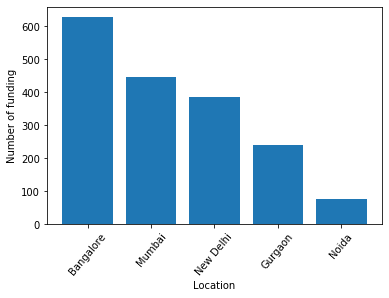

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Pandas_Project\\Case_study2_(Startup_funding)\\startup_funding.csv"
data=pd.read_csv(path)

df=data.copy()
df.dropna(subset = ["CityLocation"],inplace = True)
# df['CityLocation']=df['CityLocation'].str.split('/',expand=True)[0]
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
cities=['New Delhi', 'Bangalore','Mumbai', 'Noida', 'Gurgaon']
df=df[df['CityLocation'].isin(cities)]
city=df['CityLocation'].value_counts()
print("City recieved maximum funding is:",city.index[0])
x=city.index
y=city.values

plt.xlabel('Location')
plt.ylabel('Number of funding')
plt.xticks(rotation=50)

plt.bar(x,y)
plt.show()

# Q2.
'''Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.'''

# Explanation:

1. Read the data from csv file using read_csv function.
2. Dropped the rows containing Nan in investor's name column.
3. Created a function createDict which created a dictionary "d" by traversing through each and every investor’s name and maintaining a count for each investor. There are many places where there are multiple investor’s name , in those conditions used split function to split all the names and traversed through each name separately and maintained there count.createDict function will return d to variable dictionary.
4. After getting the total number of times each investors invested in startups, sorted the keys according to the values of the dictionary in decreasing order in sorted_dict. Traversed the sorted_dict dictionary till 5 key-value pairs to print the first five names and stored key values in x and values in y to plot a pie chart based on y.

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


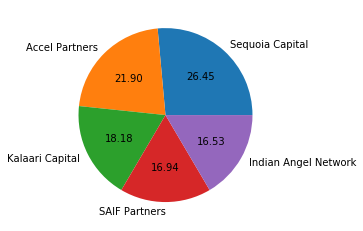

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

path="C:\\Users\\RAHUL\\Documents\\Pandas_Project\\Case_study2_(Startup_funding)\\startup_funding.csv"
data=pd.read_csv(path)
df=data.copy()
df.dropna(subset=['InvestorsName'],inplace=True)
def createDict(array):
    d={}
    for i in array:
        if ',' not in i:
            d[i]=d.get(i,0)+1
        else:
            string=i.strip().split(',')
            for j in string:
                j=j.strip()
                d[j]=d.get(j,0)+1
    return d
            
dictionary=createDict(df['InvestorsName'])
sorted_dict=sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True)
x,y=[],[]
for key,val in sorted_dict[:5]:
    x.append(key)
    y.append(val)
    print(key)
plt.pie(y, autopct="%.2f" ,labels=x)
plt.show()

# Q3.
'''After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.'''

# Explanation:

1. Read the data from csv file using read_csv function. 
2. Dropped the rows containing Nan in investor's name , startup name columns .
3. Rectifying the error names in startup names by changing all the startupNames containing Oyo, Flipkart, Ola and Paytm to only  Oyo, Flipkart, Ola and Paytm. 
4. Created a dictionary named d, for each investor names maintained a set, means each key (investor's name) having value , a
set(names of startups in which they invested). Set is taken as a value to avoid count of multiple investments in a single startup by an investor . In the set there are unique startup names in which investor's had invested . There are many places where there are multiple investor’s name, in those conditions used split function to split all the names and traversed through
each name separately and maintained the startup’s in which they invested. 
5. Created a new dictionary where key is investors name and value is length of set of values of previous dictionary i.e the
number of startups in which they invested , after that sorted the keys according to the values of the dictionary in decreasing order.
6. Printed the first five names.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

path="C:\\Users\\RAHUL\\Documents\\Pandas_Project\\Case_study2_(Startup_funding)\\startup_funding.csv"
data=pd.read_csv(path)
df=data.copy()

df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)
# rectifying spells of the startup names:

df.StartupName = df.StartupName.apply(lambda x: 'Oyo' if 'Oyo' in x else x)
df.StartupName = df.StartupName.apply(lambda x: 'Flipkart' if 'Flipkart' in x else x)
df.StartupName = df.StartupName.apply(lambda x: 'Ola' if 'Ola' in x else x)
df.StartupName = df.StartupName.apply(lambda x: 'Paytm' if 'Paytm' in x else x)


investors=np.array(df['InvestorsName'])
startup=np.array(df['StartupName'])

d={}
for i in range(len(investors)):
    if ',' not in investors[i]:
        if investors[i] in d:
            d[investors[i]].add(startup[i])
        else:
            d[investors[i]]=set()
            d[investors[i]].add(startup[i])
    else:
        string=investors[i].strip().split(',')
        for j in string:
            j=j.strip()
            if j in d:
                d[j].add(startup[i])
            else:
                d[j]=set()
                d[j].add(startup[i])

                
h={}
for key, value in d.items():
    #print value
    if key!='':
        h[key]=len(list(filter(None, value)))

h= dict(sorted(h.items(), key=operator.itemgetter(1),reverse=True))
h= dict(list(h.items())[0: 5])
for key, value in h.items(): 
    print (key)



Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


# Q4.
'''Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.'''

# Explanation:

1. Read the data from csv file using read_csv function, after that dropped the rows containing Nan in investor's name column.
2. Replaced the Undisclosed Investors type with "".
3. Rectified the names of the Investment Types as per the requirement.
4. Filtered the database , kept only those rows having investment type "Seed funding" and "Crowd funding". Created a dictionary by the name d, traversed through each and every investor’s name and maintained a count for each investor. There are many places where there are multiple investor’s name , in those conditions used split function to split all the names and traversed through each name separately and maintained there count . 
5. Deleted the "" keys from the dictionary d.
6. After getting the total number of times each investors invested in startups, sorted the keys according to the values of the dictionary in decreasing order and printed the first five names.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Pandas_Project\\Case_study2_(Startup_funding)\\startup_funding.csv"
data=pd.read_csv(path)
df=data.copy()
df.dropna(subset=['InvestorsName'],inplace=True)

df['InvestorsName'].replace('Undisclosed Investors','', inplace=True)
df['InvestorsName'].replace('Undisclosed investors','', inplace=True)
df['InvestorsName'].replace('undisclosed investors','', inplace=True)

# rectifying spells of the Investment types
df['InvestmentType'].replace('PrivateEquity','Private Equity', inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding', inplace=True)
df['InvestmentType'].replace('DebtFunding','Debt Funding', inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding', inplace=True)
df=df[(df['InvestmentType']!="Private Equity") & (df['InvestmentType']!="Debt Equity")]

d={}
for i in df['InvestorsName'].values:
    if ',' in i:
        string=i.strip().split(',')
        for j in string:
            j=j.strip()
            d[j]=d.get(j,0)+1
    else:
        d[i]=d.get(i,0)+1
    
del d[""]
        
h= dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
h= dict(list(h.items())[0:5])
for key, value in h.items(): 
    print (key)
     


Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Group of Angel Investors


# Q5.
'''Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.'''

# Explanation:

1. Read the data from csv file using read_csv function.
2. Dropped the rows containing Nan in investor's name column. 
3. Rectified the names of the Investment Types as per the requirement.
4. Filtered the database , kept only those rows having investment type "private equity". 
5. Created a dictionary by the name d , traversed through each and every investor’s name and maintained a count for each investor. There are many places where there are multiple investor’s name , in those conditions used split function to split all the names and traversed through each name separately and maintained there count.
6. After getting the total number of times each investors invested in startups, sorted the keys according to the values of the dictionary in decreasing order and printed the first five names.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

path="C:\\Users\\RAHUL\\Documents\\Pandas_Project\\Case_study2_(Startup_funding)\\startup_funding.csv"
data=pd.read_csv(path)
df=data.copy()
df.dropna(subset=['InvestorsName'],inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','', inplace=True)
df['InvestorsName'].replace('Undisclosed investors','', inplace=True)
df['InvestorsName'].replace('undisclosed investors','', inplace=True)
# rectifying spells of the startup names:
# df.StartupName = df.StartupName.apply(lambda x: 'Oyo' if 'Oyo' in x else x)
# df.StartupName = df.StartupName.apply(lambda x: 'Flipkart' if 'Flipkart' in x else x)
# df.StartupName = df.StartupName.apply(lambda x: 'Ola' if 'Ola' in x else x)
# df.StartupName = df.StartupName.apply(lambda x: 'Paytm' if 'Paytm' in x else x)

# rectifying spells of the Investment types
df['InvestmentType'].replace('PrivateEquity','Private Equity', inplace=True)
# df['InvestmentType'].replace('SeedFunding','Seed Funding', inplace=True)
# df['InvestmentType'].replace('Crowd funding','Crowd Funding', inplace=True)
df=df[(df['InvestmentType']=="Private Equity")]

d={}
for i in df['InvestorsName'].values:
    if ',' in i:
        string=i.strip().split(',')
        for j in string:
            j=j.strip()
            d[j]=d.get(j,0)+1
    else:
        d[i]=d.get(i,0)+1
    
del d[""]
        
h= dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
h= dict(list(h.items())[:5])
for key, value in h.items(): 
    print (key)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Blume Ventures
